### 1) В переменной df находится датафрэйм. Ваша задача положить в переменную  df_shape строку с информацией сколько линий и столбцов он имеет в следующем виде:
'df has y rows and x columns'

где y – число строк, а x – число колонок.

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({'a':[1,2,3,4],'b':[1,2,3,4]})

In [4]:
df_shape = f'df has {df.shape[0]} and {df.shape[1]} columns'

In [5]:
df_shape

'df has 4 and 2 columns'

### 2) Положите в переменную na_number серию, в которой для каждой колонки указано сколько ячеек содержат пропущенные значения. Например, для такого датафрэйма: task2_1.png (в папке)
Ответ будет: task2_2.png (в папке)

In [6]:
import numpy as np

In [7]:
df = pd.DataFrame({'client_id':[1,2,3,4,5], 'sex':[0,1,1,1,0],'wealt':["h","h","h","h","h"],'age':[58,55,46,23,44]})
df.loc[[0,2,3],['client_id','sex','wealt']] = np.nan

In [8]:
df.isna().sum()

client_id    3
sex          3
wealt        3
age          0
dtype: int64

### 3) Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [9]:
df_types = df.dtypes
df_types

client_id    float64
sex          float64
wealt         object
age            int64
dtype: object

### 4) Внезапно оказалось, что в переменной age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

In [10]:
df.age = df.age.astype({'age' : 'int'})

In [11]:
df.dtypes

client_id    float64
sex          float64
wealt         object
age            int32
dtype: object

### 5) Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

In [12]:
df = df[['client_id','wealt']] #или .drop(columns = ['sex','age'])

In [13]:
df

,client_id,wealt
0,NaN,NaN
1,2.0,h
2,NaN,NaN
3,NaN,NaN
4,5.0,h


### 6) А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id – дропните все строки, в которых значения в колонке client_id повторяются.

In [14]:
df = df.drop_duplicates(subset = 'client_id')

In [15]:
df

,client_id,wealt
0,NaN,NaN
1,2.0,h
4,5.0,h


### 7) Небольшой перерыв на чистый питон. В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. При этом, если вам попался 0, то нужно прекратить этот цикл.
Например,
numbers = [1, -2, 3, 0, -3, 2]

Тогда positive_numbers должен быть:
positive_numbers = [1, 3]

In [16]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []
for num in numbers:
    if num == 0:
        break
    if num > 0:
        positive_numbers.append(num)
positive_numbers

[1, 3]

### 8) Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. 

Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). 

Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

In [17]:
taxi = pd.read_csv(r'C:\Users\arkhi\Jupyter notebook\data\taxi_peru.csv', 
                   encoding='utf-8', 
                   sep = ';', 
                   parse_dates= ['start_at', 'end_at', 'arrived_at'])

In [18]:
taxi.query('start_type == ["asap", "reserved"]')

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-10-02 05:26:00,"-12,09253011","-77,02875271",2010-10-02 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-10-02 05:39:00,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0


### 9) ⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')

In [19]:
taxi['wait_time'] = (taxi['arrived_at'] - taxi['start_at']).astype('timedelta64[m]')

### 9.1) ⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.

Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [20]:
taxi.query('start_type == "reserved" and wait_time > 0.0').groupby('driver_id').agg({'driver_id':'count'}).idxmax()

driver_id    406921adcca37705ef527b4246c0cfea
dtype: object

### 10) Подумайте, что может влиять на число опозданий из прошлого задания

### 11) ⭐️Задание со звёздочкой!⭐️
Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

In [21]:
taxi['month'] = taxi['start_at'].dt.month
taxi['weekday'] = taxi['start_at'].dt.strftime('%A')

### 12) ⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). 

Подумайте, с чем может быть связана полученная картина. 

Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8).

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\arkhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


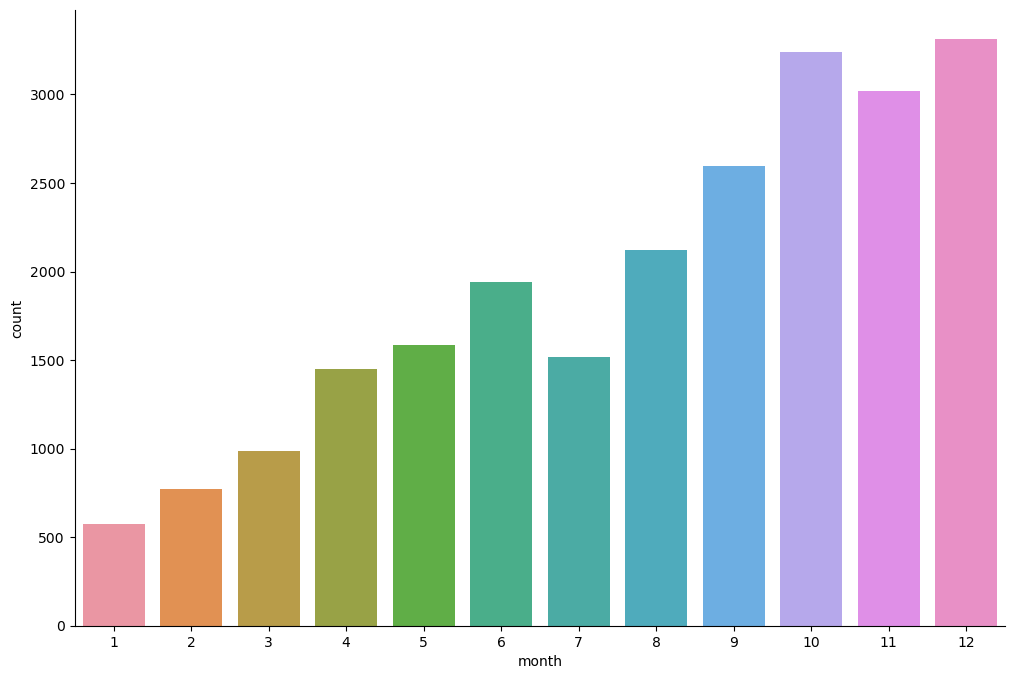

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(taxi.month)
sns.despine()

### 13) ⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например:
```
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
```
Вопрос: в какой день недели суммарно поступило меньше всего заказов?


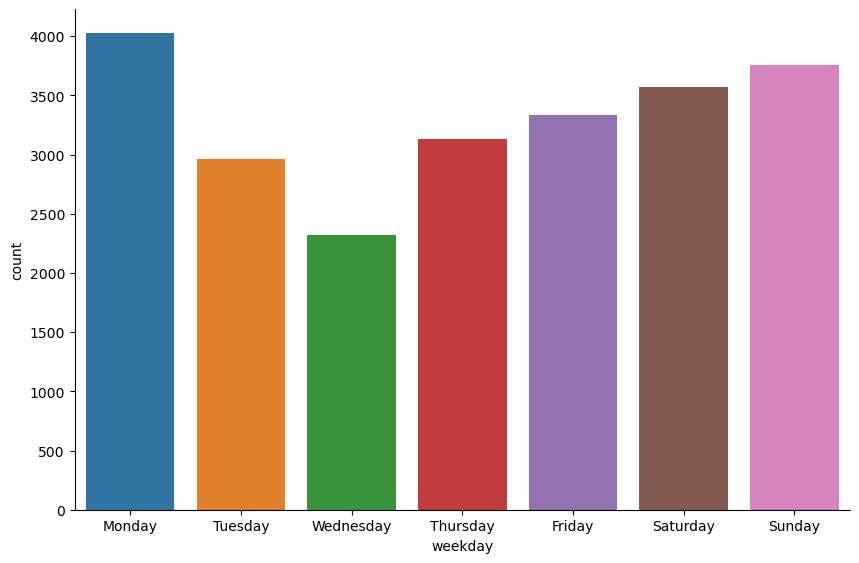

In [34]:
plt.figure(figsize=(10, 6.5))
sns.countplot(taxi.weekday, 
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.despine()

### 14) ⭐️Задание со звёздочкой!⭐️
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
- DAU (daily active users) – число уникальных пользователей за день
- WAU (weekly active users) – число уникальных пользователей за неделю
- MAU (monthly active users) – число уникальных пользователей за месяц

Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. 

Постройте график MAU и выберите верные утверждения. 

Могут пригодиться:
- groupby – группировка
- nunique – число уникальных значений
- plot.line – линейная диаграмма

In [37]:
mau = taxi.groupby('month').nunique().user_id

In [42]:
xticks=range(1,13)

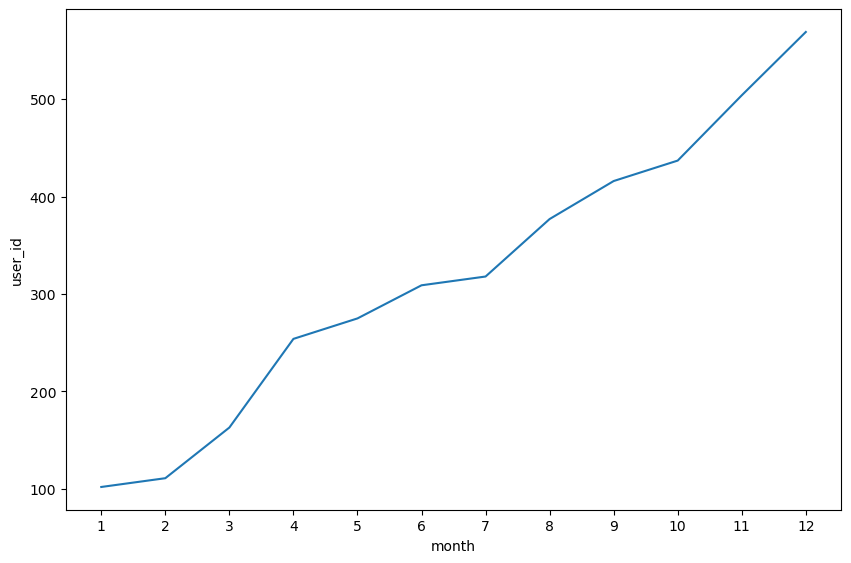

In [44]:
plt.figure(figsize=(10,6.5))
sns.lineplot(data=mau, markers='o-')
plt.xticks(xticks);

# That's all!!!